In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from tqdm import tqdm
from glob import glob
import os

In [14]:
FIRSTDATE = '1972-12'
LASTDATE = '1977-05'
monthRange = np.arange(np.datetime64(FIRSTDATE,'M'),np.datetime64(LASTDATE,'M'))

In [ ]:
HEMISPHERE = 'N'
DATADIR = 'D:/N5ESMR/N5ESMR_out/ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_NH-fv1.1'

SIA_NH = np.ones(len(monthRange))*np.nan
i=-1
for date in tqdm(monthRange):
    i+=1
    date_s = str(date)
    year = date_s[:4]
    month = date_s[5:7]
    dataFile = os.path.join(DATADIR,"ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_" + HEMISPHERE + "H-"+year+month+"*-fv1.1.nc")
    files = glob(dataFile)
    if len(files)>10:
        SIC = []
        for f in files:
            ds = xr.load_dataset(f)
            cSIC = ds.ice_conc.to_numpy().squeeze()
            SIC.append(cSIC)
        mSIC = np.nanmean(np.stack(SIC),axis=0)
        SIA_NH[i] = np.nansum(mSIC/100)*25**2

  0%|          | 0/53 [00:00<?, ?it/s]C:\Users\emilt\AppData\Local\Temp\ipykernel_44292\3004443056.py:19: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  2%|▏         | 1/53 [00:00<00:48,  1.08it/s]C:\Users\emilt\AppData\Local\Temp\ipykernel_44292\3004443056.py:19: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  4%|▍         | 2/53 [00:02<01:01,  1.20s/it]C:\Users\emilt\AppData\Local\Temp\ipykernel_44292\3004443056.py:19: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  6%|▌         | 3/53 [00:03<01:02,  1.24s/it]C:\Users\emilt\AppData\Local\Temp\ipykernel_44292\3004443056.py:19: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
 13%|█▎        | 7/53 [00:04<00:27,  1.68it/s]C:\Users\emilt\AppData\Local\Temp\ipykernel_44292\3004443056.py:19: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
 15%|█▌        | 8/53 [00:06<00:33,  1.35it/s]C:

In [ ]:
HEMISPHERE = 'S'
DATADIR = 'D:/N5ESMR/N5ESMR_out/ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_SH-fv1.1'

SIA_SH = np.ones(len(monthRange))*np.nan

i=-1
for date in tqdm(monthRange):
    i+=1
    date_s = str(date)
    year = date_s[:4]
    month = date_s[5:7]
    dataFile = os.path.join(DATADIR,"ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_" + HEMISPHERE + "H-"+year+month+"*-fv1.1.nc")
    files = glob(dataFile)
    if len(files)>10:
        SIC = []
        for f in files:
            ds = xr.load_dataset(f)
            cSIC = ds.ice_conc.to_numpy().squeeze().astype(np.float64)
            SIC.append(cSIC)
        mSIC = np.nanmean(np.stack(SIC),axis=0)
        SIA_SH[i] = np.nansum(mSIC/100)*25**2


  0%|          | 0/53 [00:00<?, ?it/s]C:\Users\emilt\AppData\Local\Temp\ipykernel_44292\3767517850.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  2%|▏         | 1/53 [00:00<00:47,  1.09it/s]C:\Users\emilt\AppData\Local\Temp\ipykernel_44292\3767517850.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  4%|▍         | 2/53 [00:02<01:00,  1.19s/it]C:\Users\emilt\AppData\Local\Temp\ipykernel_44292\3767517850.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  6%|▌         | 3/53 [00:03<01:00,  1.20s/it]C:\Users\emilt\AppData\Local\Temp\ipykernel_44292\3767517850.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
 13%|█▎        | 7/53 [00:04<00:26,  1.75it/s]C:\Users\emilt\AppData\Local\Temp\ipykernel_44292\3767517850.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
 15%|█▌        | 8/53 [00:06<00:32,  1.40it/s]C:

In [25]:
df_nh = pd.DataFrame({'Date':monthRange,
                   'SIA_NH[km^2]':SIA_NH
                   })
df_sh = pd.DataFrame({'Date':monthRange,
                   'SIA_SH[km^2]':SIA_SH
                   })

df_nh.to_csv('N5ESMR_SIArea_NH_197212-197705.csv',index=False)
df_sh.to_csv('N5ESMR_SIArea_SH_197212-197705.csv',index=False)

Text(0.5, 0, 'Date')

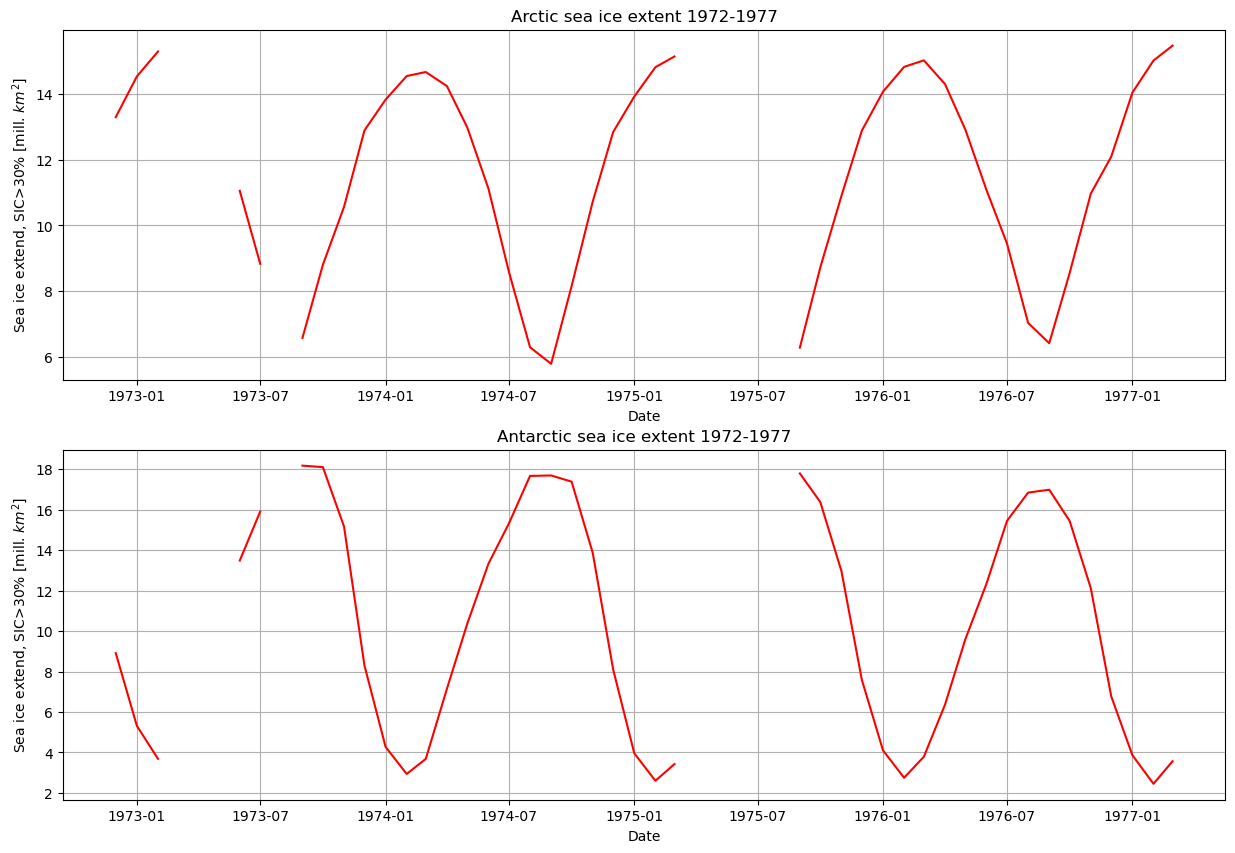

In [26]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
ax[0].plot(monthRange,SIA_NH/1e6,'r-')
ax[0].grid()
ax[0].set_title('Arctic sea ice extent 1972-1977')
ax[0].set_ylabel('Sea ice extend, SIC>30% [mill. $km^2$]')
ax[0].set_xlabel('Date')
#ax[0].set_ylim([3,17])


ax[1].plot(monthRange,SIA_SH/1e6,'r-')
ax[1].grid()
ax[1].set_title('Antarctic sea ice extent 1972-1977')
ax[1].set_ylabel('Sea ice extend, SIC>30% [mill. $km^2$]')
ax[1].set_xlabel('Date')
#ax[1].set_ylim([0,20])

In [27]:
osisaf_sia_nh = pd.read_csv('osisaf_nh_sia_monthly.txt',sep=' ',skiprows=7,names=['dec_year','year','month','date','sia'])
osisaf_sia_nh  = osisaf_sia_nh[osisaf_sia_nh['sia']!=-999]

osisaf_sia_sh = pd.read_csv('osisaf_sh_sia_monthly.txt',sep=' ',skiprows=7,names=['dec_year','year','month','date','sia'])
osisaf_sia_sh  = osisaf_sia_sh[osisaf_sia_sh['sia']!=-999]

In [28]:
import numpy as np
import pandas as pd

def decimal_years_to_datetime64(decimal_years):
    """
    Convert an array of decimal years to np.datetime64.
    
    Parameters:
        decimal_years (array-like): 1D array of decimal years (e.g., [2023.5, 2024.25])
    
    Returns:
        np.ndarray of np.datetime64[D]
    """
    decimal_years = np.asarray(decimal_years)
    years = decimal_years.astype(int)
    remainders = decimal_years - years

    # Get whether each year is a leap year
    is_leap = pd.to_datetime([f"{y}-12-31" for y in years]).dayofyear == 366
    days_in_year = np.where(is_leap, 366, 365)

    # Calculate days to add
    days = remainders * days_in_year
    base_dates = pd.to_datetime([f"{y}-01-01" for y in years])
    final_dates = base_dates + pd.to_timedelta(days, unit='D')

    return final_dates.to_numpy(dtype="datetime64[D]")

(0.0, 20.0)

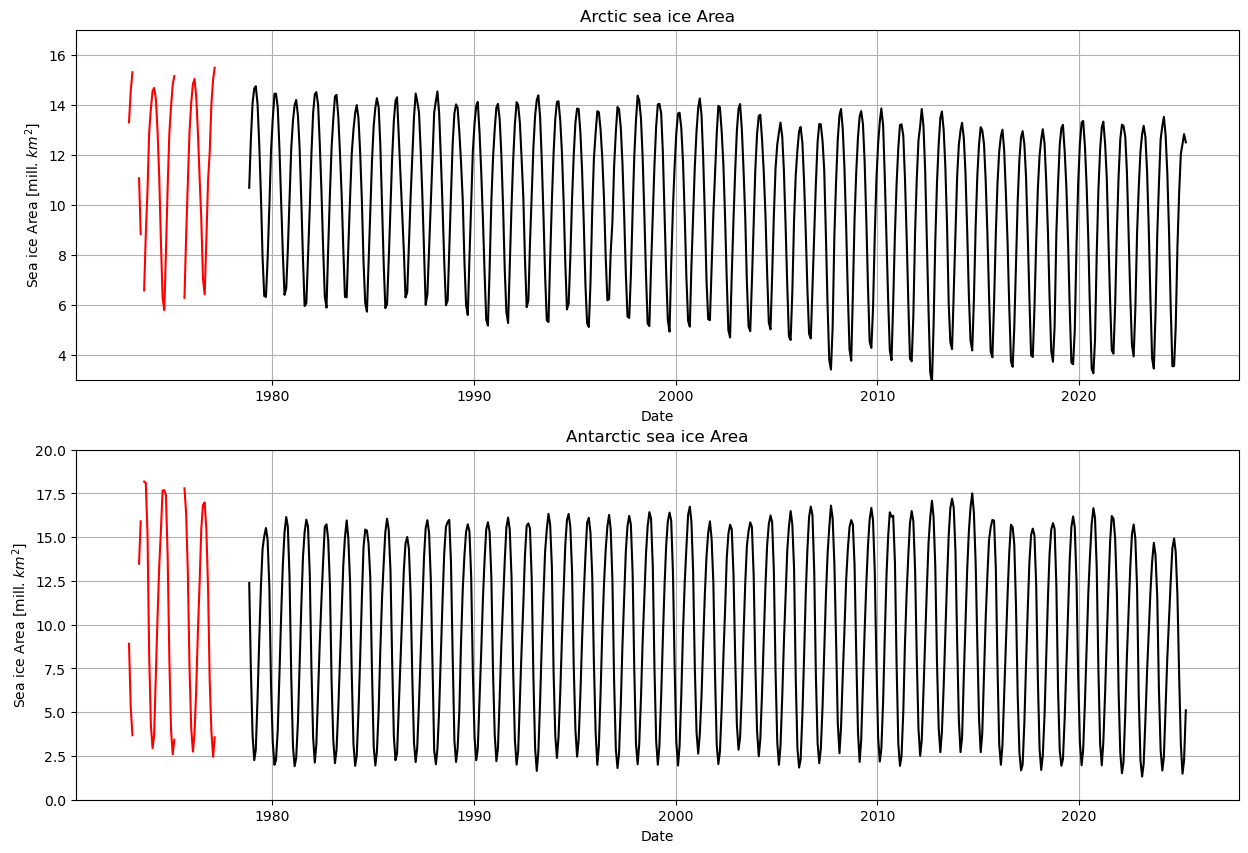

In [29]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
ax[0].plot(monthRange,SIA_NH/1e6,'r-')
ax[0].plot(decimal_years_to_datetime64(osisaf_sia_nh['dec_year']),osisaf_sia_nh['sia']/1e6,'k-')
ax[0].grid()
ax[0].set_title('Arctic sea ice Area')
ax[0].set_ylabel('Sea ice Area [mill. $km^2$]')
ax[0].set_xlabel('Date')
ax[0].set_ylim([3,17])


ax[1].plot(monthRange,SIA_SH/1e6,'r-')
ax[1].plot(decimal_years_to_datetime64(osisaf_sia_sh['dec_year']),osisaf_sia_sh['sia']/1e6,'k-')
ax[1].grid()
ax[1].set_title('Antarctic sea ice Area')
ax[1].set_ylabel('Sea ice Area [mill. $km^2$]')
ax[1].set_xlabel('Date')
ax[1].set_ylim([0,20])

In [32]:
nh_osisaf_dates = decimal_years_to_datetime64(osisaf_sia_nh['dec_year'])
sh_osisaf_dates = decimal_years_to_datetime64(osisaf_sia_nh['dec_year'])

In [48]:
september_osisaf_nh =  np.array([d.month for d in nh_osisaf_dates.astype('datetime64[M]').astype(object)]) == 9
september_osisaf_sh = np.array([d.month for d in sh_osisaf_dates.astype('datetime64[M]').astype(object)]) == 9
september_ESMR =  np.array([d.month for d in monthRange.astype('datetime64[M]').astype(object)]) == 9

(12.0, 20.0)

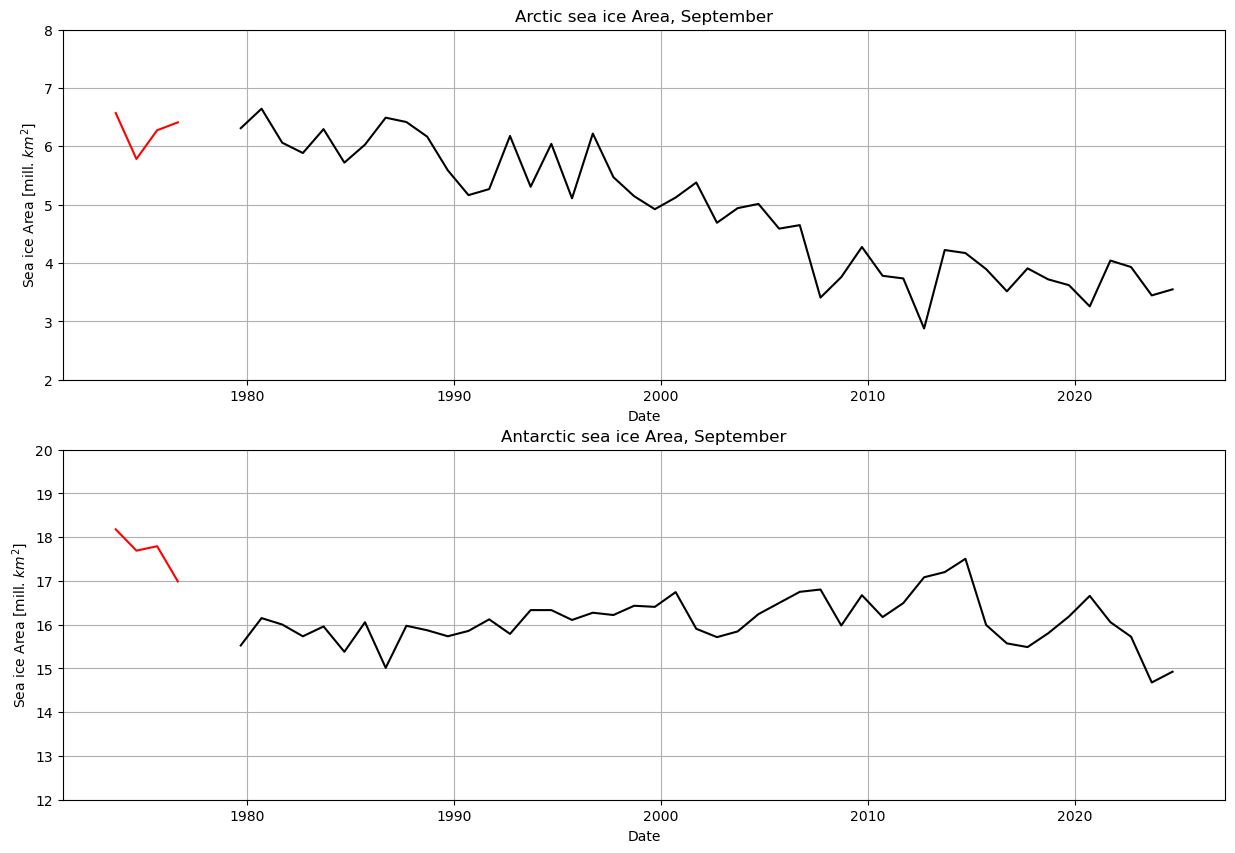

In [54]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
ax[0].plot(monthRange[september_ESMR],SIA_NH[september_ESMR]/1e6,'r-')
ax[0].plot(decimal_years_to_datetime64(osisaf_sia_nh['dec_year'])[september_osisaf_nh],osisaf_sia_nh['sia'][september_osisaf_nh]/1e6,'k-')
ax[0].grid()
ax[0].set_title('Arctic sea ice Area, September')
ax[0].set_ylabel('Sea ice Area [mill. $km^2$]')
ax[0].set_xlabel('Date')
ax[0].set_ylim([2,8])


ax[1].plot(monthRange[september_ESMR],SIA_SH[september_ESMR]/1e6,'r-')
ax[1].plot(decimal_years_to_datetime64(osisaf_sia_sh['dec_year'])[september_osisaf_sh],osisaf_sia_sh['sia'][september_osisaf_sh]/1e6,'k-')
ax[1].grid()
ax[1].set_title('Antarctic sea ice Area, September')
ax[1].set_ylabel('Sea ice Area [mill. $km^2$]')
ax[1].set_xlabel('Date')
ax[1].set_ylim([12,20])